# Questão 1 e 2

DATASET
-Nome: Contraceptive Method Choice Data Set(Conjunto de dados sobre escolhas de metodos contraceptivos)

-Volume de dados: 1473 amostras.

-Descrição: Este dataset é um subconjunto de um estudo feito na Indonésia sobre a prevalência métodos contraceptivos. O estudo foi feito baseado em mulheres casadas que não estavam grávidas ou não sabiam se estavam grávidas no momento da intrevista.

-Objetivo: O objetivo é prever qual metodo contraceptivo(no use, long-term methods, or short-term methods) é utilizado com base nas características demograficas e socioeconomica da mulher.

-Colunas: 1. Idade da esposa (numerico) 
		2. Nível de educação da Esposa (categorico) 1=low, 2, 3, 4=high 
		3. Nível de educação do marido (categorico) 1=low, 2, 3, 4=high 
		4. Quantidade de filhos (numerico) 
		5. Religião da esposa (binario) 0=Non-Islam, 1=Islam 
		6. Esposa possui trabalho? (binario) 0=Yes, 1=No 
		7. Ocupação do marido (categorico) 1, 2, 3, 4 
		8. padrao de vida index (categorico) 1=low, 2, 3, 4=high 
		9. Exposição a midia (binario) 0=Good, 1=Not good 
		10. Metodo contraceptivo utilizado (class attribute) 1=No-use, 2=Long-term, 3=Short-term

-Campos Nulos: nenhum

-Variaveis Categoricas: Nível de educação da Esposa; Nível de educação do marido; Ocupação do marido; padrao_de_vida index.

In [57]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
df = pd.read_csv('dataset.csv')

for column in df[['educacao_esposa', 'educacao_marido', 'marido_ocupacao', 'padrao_de_vida']]:
    low = df[column] == 1
    regular = df[column] == 2
    good = df[column] == 3
    high = df[column] == 4
    df.loc[low, column] = 'low'
    df.loc[regular, column] = 'regular'
    df.loc[good, column] = 'good'
    df.loc[high, column] = 'high'

df = df.sample(frac=1)
df.head(10)


,idade_esposa,educacao_esposa,educacao_marido,quantidade_filhos,religiao_esposa,eposa_trabalha,marido_ocupacao,padrao_de_vida,exposicao_midia,metodo_contraceptivo
873,26,regular,good,2,1,1,good,good,0,3
356,23,regular,high,2,1,1,low,high,0,1
22,46,high,high,1,0,1,low,high,0,1
218,32,good,regular,4,1,1,regular,regular,1,1
836,27,high,high,3,1,1,good,high,1,3
166,49,good,high,5,1,1,low,high,0,1
822,28,good,high,2,1,1,regular,good,0,3
81,49,high,high,6,0,0,low,high,0,1
983,33,high,high,2,1,1,regular,high,0,3
1190,24,good,high,2,1,1,regular,regular,0,1


In [58]:
df.describe()

,idade_esposa,quantidade_filhos,religiao_esposa,eposa_trabalha,exposicao_midia,metodo_contraceptivo
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,3.261371,0.850645,0.749491,0.073999,1.919891
std,8.227245,2.358549,0.356559,0.433453,0.261858,0.876376
min,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,32.000000,3.000000,1.000000,1.000000,0.000000,2.000000
75%,39.000000,4.000000,1.000000,1.000000,0.000000,3.000000
max,49.000000,16.000000,1.000000,1.000000,1.000000,3.000000


In [59]:
df.isnull().sum()

idade_esposa            0
educacao_esposa         0
educacao_marido         0
quantidade_filhos       0
religiao_esposa         0
eposa_trabalha          0
marido_ocupacao         0
padrao_de_vida          0
exposicao_midia         0
metodo_contraceptivo    0
dtype: int64

# Questão 2 análises

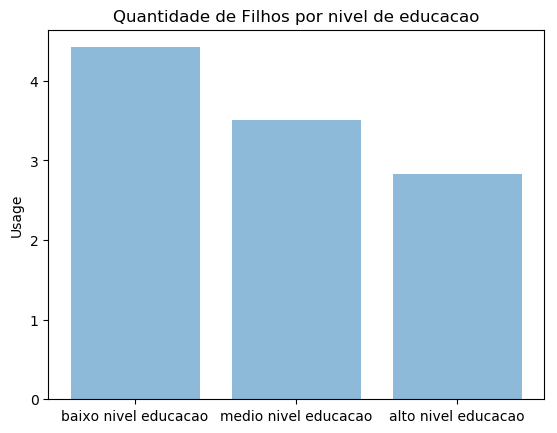

In [60]:
low = df[df['educacao_esposa'] == 'low']
quantidade_low = low['educacao_esposa'].count()
media_low = low['quantidade_filhos'].sum() / quantidade_low

regular = df[df['educacao_esposa'] == 'regular']
quantidade_regular = regular['educacao_esposa'].count()
media_regular = regular['quantidade_filhos'].sum() / quantidade_regular

high = df[df['educacao_esposa'] == 'high']
quantidade_high = high['educacao_esposa'].count()
media_high = high['quantidade_filhos'].sum() / quantidade_high

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('baixo nivel educacao', 'medio nivel educacao', 'alto nivel educacao')
y_pos = np.arange(len(objects))
performance = [media_low, media_regular, media_high]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Quantidade de Filhos por nivel de educacao')
 
plt.show()

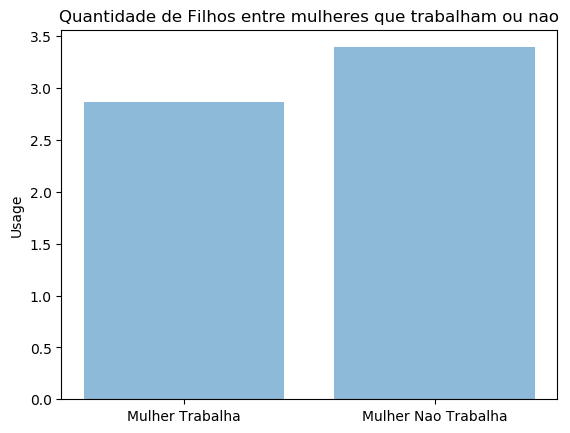

In [61]:
eposa_trabalha = df[df['eposa_trabalha'] == 0]
quantidade_eposa_trabalha = eposa_trabalha['eposa_trabalha'].count()
eposa_nao_trabalha = df[df['eposa_trabalha'] == 1]
quantidade_eposa_nao_trabalha = eposa_nao_trabalha['eposa_trabalha'].count()

media_filhos_esposa_trabalha = eposa_trabalha['quantidade_filhos'].sum() / quantidade_eposa_trabalha 
media_filhos_esposa_nao_trabalha = eposa_nao_trabalha['quantidade_filhos'].sum() / quantidade_eposa_nao_trabalha 


objects = ('Mulher Trabalha', 'Mulher Nao Trabalha')
y_pos = np.arange(len(objects))
performance = [media_filhos_esposa_trabalha, media_filhos_esposa_nao_trabalha]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Quantidade de Filhos entre mulheres que trabalham ou nao')
 
plt.show()

	 Utilização de Metodo Contraceptivo 

Islam:


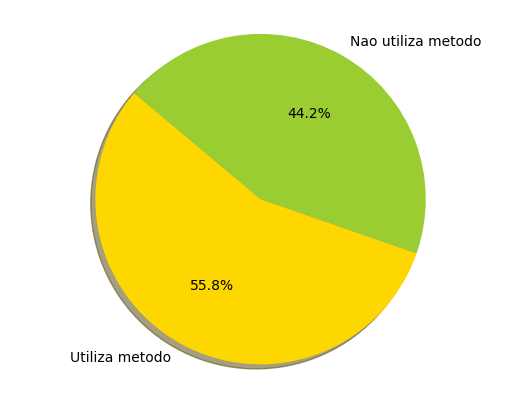

No Islam:


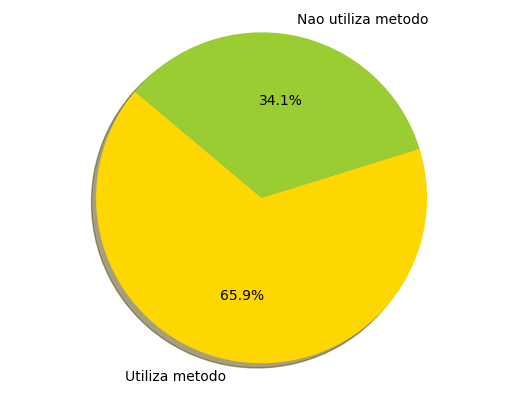

General:


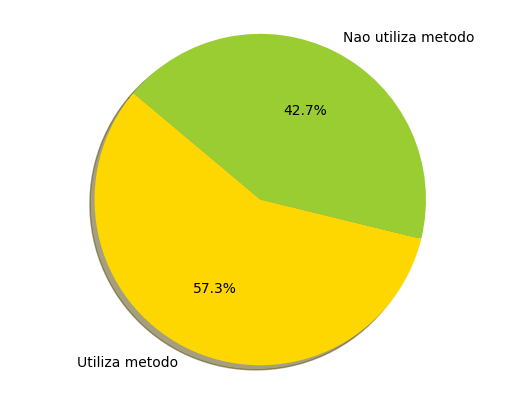

In [62]:
import matplotlib.pyplot as plt

religiao = df[df['religiao_esposa'] == 1]
quantidade_metodo = religiao[religiao['metodo_contraceptivo'] != 1]['metodo_contraceptivo'].count()
quantidade_nao_metodo = religiao[religiao['metodo_contraceptivo'] == 1]['metodo_contraceptivo'].count()

# Data to plot
labels = 'Utiliza metodo', 'Nao utiliza metodo'
sizes = [quantidade_metodo, quantidade_nao_metodo]
colors = ['gold', 'yellowgreen']
# explode = (0.1, 0, 0, 0)  # explode 1st slice
print("\t Utilização de Metodo Contraceptivo \n")
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
print("Islam:")
plt.axis('equal')
plt.show()

religiao = df[df['religiao_esposa'] == 0]
quantidade_metodo = religiao[religiao['metodo_contraceptivo'] != 1]['metodo_contraceptivo'].count()
quantidade_nao_metodo = religiao[religiao['metodo_contraceptivo'] == 1]['metodo_contraceptivo'].count()

# Data to plot
labels = 'Utiliza metodo', 'Nao utiliza metodo'
sizes = [quantidade_metodo, quantidade_nao_metodo]
colors = ['gold', 'yellowgreen']
# explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
print("No Islam:")
plt.axis('equal')
plt.show()

quantidade_metodo = df[df['metodo_contraceptivo'] != 1]['metodo_contraceptivo'].count()
quantidade_nao_metodo = df[df['metodo_contraceptivo'] == 1]['metodo_contraceptivo'].count()

labels = 'Utiliza metodo', 'Nao utiliza metodo'
sizes = [quantidade_metodo, quantidade_nao_metodo]
colors = ['gold', 'yellowgreen']
# explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
print("General:")
plt.axis('equal')
plt.show()

# Questao 3 listagem de algoritmos e comparações

In [46]:
# MultinomialNB, OneVsOneClassifier, OneVsRestClassifier
df = df.drop(['idade_esposa','quantidade_filhos'], axis=1)
x = df.drop(['metodo_contraceptivo'], axis=1)
y = df['metodo_contraceptivo']

x = pd.get_dummies(x)

In [47]:
from scipy.stats import bayes_mvs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

multinomialNB = MultinomialNB()

k = 10
scores = cross_val_score(multinomialNB, x, y, cv = k)

In [48]:
from scipy.stats import bayes_mvs

algoritmo = scores.mean()

In [49]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import warnings

warnings.filterwarnings('ignore')

modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsOne,x,y,cv = k)
algoritmo1 = scores.mean()

In [50]:
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsRest,x,y,cv = k)
algoritmo2 = scores.mean()

In [51]:
print(algoritmo, algoritmo1, algoritmo2)

0.43933512604791447 0.4603553590928654 0.45965663828651254


# Questao 4. graficos, matriz confusão e metricas

In [52]:
trace = go.Bar(
            x=['MultinomialNB', 'OneVsOneClassifier','OneVsRestClassifier'],
            y=[algoritmo*100, algoritmo1*100,algoritmo2*100]
    )
data = [trace]

layout = go.Layout(
    title="Perfomance dos algoritmos (Acurácia) em %",
)

plotly.tools.set_credentials_file(username='fabiomsrs', api_key='kaim3eXD0bQjCmwB3v5A')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [53]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

multinomialNB.fit(x_treino, y_treino)

y_true = y_teste.values
y_pred = multinomialNB.predict(x_teste)

target_names = ['Não usa', 'Longo termo', 'Médio termo']

print("Modelo Nomial\n",classification_report(y_true, y_pred, target_names=target_names),"\nAcuracia: ", accuracy_score(y_true, y_pred))

modeloOneVsOne.fit(x_treino, y_treino)

y_true = y_teste.values
y_pred = modeloOneVsOne.predict(x_teste)

target_names = ['Não usa', 'Longo termo', 'Médio termo']
print("\nModelo One Vs One\n",classification_report(y_true, y_pred, target_names=target_names),"\nAcuracia: ", accuracy_score(y_true, y_pred))

modeloOneVsRest.fit(x_treino, y_treino)

y_true = y_teste.values
y_pred = modeloOneVsRest.predict(x_teste)

target_names = ['Não usa', 'Longo termo', 'Médio termo']
print("\nModelo One Vs Rest\n",classification_report(y_true, y_pred, target_names=target_names),"\nAcuracia: ", accuracy_score(y_true, y_pred))

Modelo Nomial
               precision    recall  f1-score   support

     Não usa       0.53      0.48      0.51       161
 Longo termo       0.34      0.57      0.42        83
 Médio termo       0.42      0.28      0.34       125

   micro avg       0.43      0.43      0.43       369
   macro avg       0.43      0.44      0.42       369
weighted avg       0.45      0.43      0.43       369
 
Acuracia:  0.43360433604336046

Modelo One Vs One
               precision    recall  f1-score   support

     Não usa       0.51      0.54      0.53       161
 Longo termo       0.38      0.43      0.41        83
 Médio termo       0.42      0.35      0.38       125

   micro avg       0.45      0.45      0.45       369
   macro avg       0.44      0.44      0.44       369
weighted avg       0.45      0.45      0.45       369
 
Acuracia:  0.45257452574525747

Modelo One Vs Rest
               precision    recall  f1-score   support

     Não usa       0.52      0.58      0.55       161
 Longo te

In [54]:
pd.crosstab(y_teste, multinomialNB.predict(x_teste),
           rownames=['Real'], colnames=['Predito'],
           margins=True)

Predito,1,2,3,All
Real,,,,
1,78,49,34,161
2,22,47,14,83
3,47,43,35,125
All,147,139,83,369


In [55]:
pd.crosstab(y_teste, modeloOneVsOne.predict(x_teste),
           rownames=['Real'], colnames=['Predito'],
           margins=True)

Predito,1,2,3,All
Real,,,,
1,87,31,43,161
2,28,36,19,83
3,54,27,44,125
All,169,94,106,369


In [56]:
pd.crosstab(y_teste, modeloOneVsRest.predict(x_teste),
           rownames=['Real'], colnames=['Predito'],
           margins=True)

Predito,1,2,3,All
Real,,,,
1,93,32,36,161
2,29,36,18,83
3,58,27,40,125
All,180,95,94,369
